In [ ]:
#Verisetine erişmek için drive bağlantısının sağlanması
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#Gerekli modüllerin import edilmesi
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision.transforms import transforms



In [ ]:
#Verilere önişlem uygulanması ve train test ayrımı yapılması

transform = transforms.Compose([
                transforms.Resize((224, 224)),  # Görüntüleri 224x224 boyutlarına dönüştürür
                transforms.ToTensor(),  # Görüntüleri tensörlere dönüştürür
                transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Görüntüleri normalize eder
            ])

from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

train_dataset = ImageFolder('/content/gdrive/My Drive/siseler/train', transform=transform)
test_dataset = ImageFolder('/content/gdrive/My Drive/siseler/test', transform=transform)

train_dataloader = DataLoader(train_dataset, batch_size=4, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=4, shuffle=False)



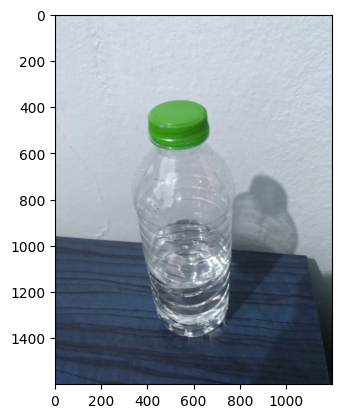

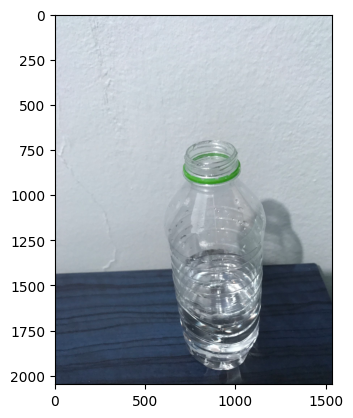

In [ ]:
#Örnek görseller
import cv2
from matplotlib import pyplot as plt
img1 = cv2.imread('/content/gdrive/My Drive/siseler/train/kapakli/013a428b-d4ff-4ff9-adb8-ddbb6ca32043.jpg') #Burada verisetinden örnek bir veri kullanılıyor
plt.imshow(img1)
plt.show()
img2 = cv2.imread('/content/gdrive/My Drive/siseler/train/kapaksiz/0f646dc9-78ba-4a86-97e0-0b909a28cbe3.jpg') #Burada verisetinden örnek bir veri kullanılıyor
plt.imshow(img2)
plt.show()

In [ ]:
# Model tanımlama ve transfer learning
model = torch.hub.load('pytorch/vision:v0.6.0', 'resnet18', pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2)

# Eğitim ayarları
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)



Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.6.0
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
#Eğitim işlemi
for epoch in range(10):
    for batch_idx, (inputs, targets) in enumerate(train_dataloader):
        inputs = inputs.to(device)
        targets = targets.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        if batch_idx % 5 == 0:
            print(f"Epoch {epoch+1}/{10}, Loss: {loss:.4f}")

Epoch 1/10, Loss: 1.0616
Epoch 2/10, Loss: 0.0167
Epoch 3/10, Loss: 0.0035
Epoch 4/10, Loss: 0.0276
Epoch 5/10, Loss: 0.3008
Epoch 6/10, Loss: 0.0463
Epoch 7/10, Loss: 0.0036
Epoch 8/10, Loss: 0.2818
Epoch 9/10, Loss: 0.0108
Epoch 10/10, Loss: 0.0236


In [ ]:
# Test
model.eval()

y_pred = []
y_true = []
with torch.no_grad():
    correct = 0
    total = 0
    for batch_idx, batch in enumerate(test_dataloader):
        inputs, targets = batch
        inputs = inputs.to(device)
        targets = targets.to(device)
        outputs = model(inputs)

        _, predicted = torch.max(outputs.data, 1)

        for i in range(test_dataloader.batch_size):
          y_t = targets[i]
          y_p = predicted[i]
          y_true.append(y_t.item())
          y_pred.append(y_p.item())
        
        total += targets.size(0)
        correct += (predicted == targets).sum().item()
    print(f"Test Accuracy: {100 * correct / total:.2f}%")

from sklearn.metrics import confusion_matrix

cf = confusion_matrix(y_true,y_pred)
print(cf)


Test Accuracy: 90.00%
[[20  0]
 [ 4 16]]
